#### **Models of Neural Systems, WS 2019/20**

**Project 2: Action potential propagation**

Contributors: Andrey Em, Luke Longren, Roopa Pai

**1. Numerically solve the cable equation (equation 1) when injecting a steady depolarizing
current halfway along the cable. Consider that the membrane is passive,
i.e. $ i_m = \frac{(V - E_L)}{r_m} $, where $r_m$ is the specific membrane resistance. Take
$r_m = 20 k \Omega cm^2$, $r_L = 200 \Omega cm$, $c_m = 1 \mu F/cm^2$, and cable radius $a = 2 \mu m$.
Compare the solution to the analytical solution of the infinite cable.**

#### (A) ANALYTICAL SOLUTION: calculate analytical solution of infinite cable

$ c_m \frac{\partial{v}}{\partial{t}} = \frac{1}{2ar_L} \frac{\partial}{\partial{x}}\left(a^2 \frac{\partial{v}}{\partial{x}}\right) - i_m + i_e$

$ 0 = \frac{1}{2ar_L} \frac{\partial}{\partial{x}}\left(a^2 \frac{\partial{v}}{\partial{x}}\right) - i_m + i_e\qquad[\because \frac{\partial{V}}{\partial{t}}=0]$

$ i_m - i_e = \frac{1}{2ar_L} \frac{\partial}{\partial{x}}\left(a^2 \frac{\partial{v}}{\partial{x}}\right)$

$ 2ar_L \left(i_m - i_e\right) = \frac{\partial}{\partial{x}}\left(a^2 \frac{\partial{v}}{\partial{x}}\right)$

$ \frac{2ar_L}{a^2} \left(i_m - i_e\right) = \frac{\partial}{\partial{x}}\left(\frac{\partial{v}}{\partial{x}}\right)$

$ \frac{\partial{v}}{\partial{x^2}} = \frac{2ar_L}{a^2} \left(i_m - i_e\right) $

$ \frac{d^2v}{x^2} = \frac{2r_L}{a} \left(i_m - i_e\right) $

$ \frac{d^2v}{x^2} = \frac{2r_L}{a} \left(\frac{v(x)}{r_m} - i_e\right)\qquad[\because i_m = \frac{V-E_L}{r_m}=\frac{v(x)}{r_m}] $

$ \frac{d^2v}{dx^2} = \frac{2r_L}{ar_m}(v(x)-i_er_m) $

**Now:**

We want the answer v(x) to be of the form $ e^{-Ax} $.

This would give: $ \frac{dv(x)}{x} = -Ae^{-Ax} + C $

Second derivative: $ \frac{dv(x)}{dx^2} = A^2e^{-Ax} + D $

**Comparison to cable equation:**

The cable equation (equation 1 from the question paper) was brought to the form $ \frac{\partial{v(x)}}{\partial{x^2}} = \frac{2r_L}{ar_m}(v(x)-i_er_m) $

This means $ A^2 = \frac{2r_L}{ar_m} $

$\therefore A = \left({\frac{2r_L}{ar_m}}\right)^{\frac{1}{2}} $


$ D = -\frac{2r_L}{ar_m}i_er_m $

**Therefore, finally:**

From $ \frac{dv}{dx^2} = A^2e^{-Ax} + D $ :

$ \frac{dv}{dx^2} = {\frac{2r_L}{ar_m}}e^{-\left({\frac{2r_L}{ar_m}}\right)^{\frac{1}{2}} x} - \frac{2r_L}{ar_m}i_er_m $

$ v(x) = e^{-\left({\frac{2r_L}{ar_m}}\right)^{\frac{1}{2}} x}  $

#### (B) NUMERICAL SOLUTION: calculate numerical solution, given finite cable

In [308]:
import numpy as np

In [309]:
#NOTE: solve for only half. We start in the middle, and the axon is symmetric.

#initial values
V0 = -65 *(10**-3) #mV (before current is injected)
L = 0.01           #meter (only solve for half of axon)
dx = 2*(10**-6)  #meters
dt = 1*(10**-5)  #seconds

#more variables, in SI units
E_L = -65 * (10**-3)          #resting potential
r_m = 20 * (10**3) * (10**-4)
r_L = 200 * (10**-2)
a_radius = 2*(10**-6)         #radius of cable
c_m = 1*(10**-6)/(10**-4)
I_e = 12.5 * (10**-9)
i_e = I_e/(2*np.pi*a_radius*dx)

Lambda = 1 / np.sqrt((2*r_L)/(a_radius*r_m))
R_Lambda = r_L*Lambda/(np.pi*(a_radius**2))
B=I_e*R_Lambda/2

print("lambda:", Lambda)
print("input resistance, R_lambda:", R_Lambda)
print("B:",B)

lambda: 0.001
input resistance, R_lambda: 159154943.09189534
B: 0.994718394324346


FUNCTION: CABLE EQUATION

In [310]:
def cable(V,x0,xmax,i_t,x,**kwargs):
    #when dV/dt = 0
    if (i_t==0): #distance from injection = 0
        i_e = kwargs["i_e"]
    else:
        i_e = 0
    A = np.sqrt((2*kwargs["r_L"])/(kwargs["a"]*kwargs["r_m"]))
    dV_dx2 = (A**2)*np.exp(-A*x) - (A**2)*i_e*kwargs["r_m"]
    return dV_dx2

FUNCTION: EULER INTEGRATOR

In [311]:
#Here, Y is "v", and T is distance

def euler_2order(f_func, X, t0, tmax, stepSize,**kwargs):
    X = np.atleast_2d(X)
    ndim = X.ndim
    Y = np.expand_dims(X, axis=ndim)
    T = np.linspace(t0,tmax, int(tmax/stepSize)+1)
    for i_t, t in enumerate(T):
        dV_dx2 = f_func(X,t0,tmax,i_t,t,**kwargs) #X from last distance step
        X = X + np.dot(-dV_dx2,(stepSize**2))
        Y = np.concatenate([Y, X[...,None]], axis=ndim)
    Y = Y[...,1:]
    return Y,T

SET VARIABLES

B is: 0.994718394324346


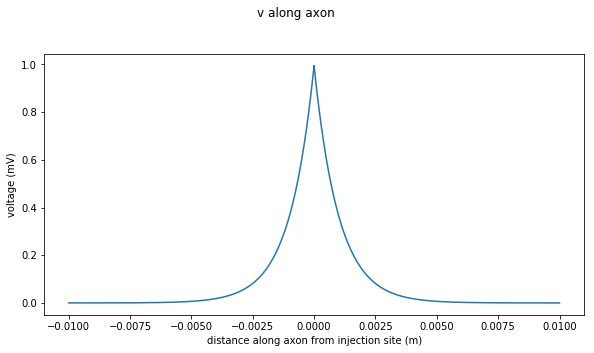

In [312]:
#Analytical solution
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
print("B is:",B)
nodes = np.linspace(0,L, int(L/dx)+1)
v = B*np.exp(-np.divide(nodes, Lambda))

plt.rcParams["figure.figsize"] = [10,5]
plt.plot(list(reversed(-nodes[1:]))+list(nodes),list(reversed(v[1:]))+list(v))
plt.xlabel('distance along axon from injection site (m)')
plt.ylabel('voltage (mV)')
plt.ticklabel_format(useOffset=False)
plt.subplots_adjust(left=0.15, top=0.85)
plt.suptitle("v along axon")
plt.show()    

CALCULATE: Inject current and calculate change in voltage along axon

In [313]:
#calculate change in voltage along axon using Euler method
Y,T = euler_2order(cable, (V0-E_L), 0, L, dx, i_e=i_e,a=a_radius,r_L=r_L, E_L=E_L, r_m=r_m, B=B)

In [314]:
print(Y.shape)
print(T.shape)

(1, 1, 5001)
(5001,)


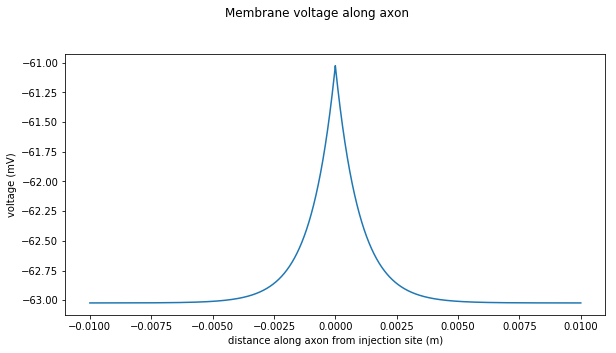

In [315]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#PLOT
plt.rcParams["figure.figsize"] = [10,5]
y = (np.array(list(reversed(Y[0,0,1:]))+list(Y[0,0,:])) + E_L) *(10**3)
x = list(reversed(-T[1:]))+list(T)
plt.plot(x,y)
plt.xlabel('distance along axon from injection site (m)')
plt.ylabel('voltage (mV)')
plt.ticklabel_format(useOffset=False)
plt.subplots_adjust(left=0.15, top=0.85)
plt.suptitle("Membrane voltage along axon")
plt.show()

**2. Implement the Hodgkin-Huxley model of action potential propagation in the
squid giant axon. Solve the partial differential equation using the Crank-Nicholson
method (see e.g. Chapters 5.5, 5.6 and 6.6B from Dayan and Abbott, 2001). Take
$a = 238 \mu m$ and $r_L = 35.4 \Omega cm$. Note that you will need to include your
code with the project report!**

**6. Simulate action potential propagation in a myelinated axon (see e.g. Chapter 6.4
from Dayan and Abbott, 2001). Consider that the nodes of Ranvier (the unmyelinated
spaces) are $2 \mu m$ long and are located at 1 mm intervals along the axon.
Also consider that myelin increases the resistance across the cell membrane by
a factor of 5,000 and decreases the capacitance by a factor of 50.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Classes

#### Model class

In [2]:
class Model:
    """This class is used to store information about the model
    
    Function Parameters stores voltages and conductances: Ek, gk, Ena, gna, Eleak, gleak
    Function Cable stores cable parameters: a, rL, L, Cm
    Function Initial_values stores initial values: n, m, h, V
    Functions for calculating alpha and beta are named by the following rule:
    alpha_n -> an, beta_n -> bn
    """
    def Parameters(self, Ek, gk, Ena, gna, Eleak, gleak):
        """This function is used to store voltages and conductances
        
        Parameters: Ek, gk, Ena, gna, Eleak, gleak
        stores voltages in V, condctances in S/m2
        """
        self.Ek = Ek
        self.gk = gk
        self.Ena = Ena
        self.gna = gna
        self.Eleak = Eleak
        self.gleak = gleak
        
    def Cable(self, a, rL, L, Cm):
        """This function is used to store cable parameters
        
        a = axon radius, in meters
        rL = intracellular resistivity, in Om m
        L = compartment length, in meters
        Cm = membrane capacitance, in F
        """
        self.a = a
        self.rL = rL
        self.L = L
        self.Cm = Cm
        self.A = 2 * np.pi * a * L
        self.g = a / (2 * rL * L * L)
        
    def Myelin(self, ranvier, interval, length, toggle):
        """This function defines how many compartments the model has and which ones are myelinated
        
        ranvier = length of Ranvier node
        interval = interval between beggining of nodes
        length = length of axon
        all parameters are in meters
        
        function returns variable Mask, an M length array
        """
        self.M = int(length / self.L)
        self.length = length
        R = int(ranvier / self.L)
        I = int(interval / self.L)
        self.Mask = np.zeros(self.M)
        if toggle == True:
            for i in range(self.M):
                if i % I >= R: self.Mask[i] = 1;
        
        
    def Initial_values(self, n0, m0, h0, V0):
        """This function is used to store the initial values
        
        Values: n0, m0, h0, V0
        """
        self.n = n0
        self.m = m0
        self.h = h0
        self.V = V0
        
        
    # Alpha and Beta
    def an(V):
        return np.divide(10000*(V + 0.055), 1 - np.exp(-100*(V + 0.055)));

    def bn(V):
        return 125 * np.exp(-12.5*(V + 0.065));

    def am(V):
        return np.divide(100000*(V + 0.040), 1 - np.exp(-100*(V + 0.040)));

    def bm(V):
        return 4000 * np.exp(-55.6*(V + 0.065));

    def ah(V):
        return 70 * np.exp(-50*(V + 0.065));

    def bh(V):
        return np.divide(1000, 1 + np.exp(-100*(V +0.035)));

### Functions

#### Crank-Nicholson

In [3]:
def C_N(dt, M, Cm, g, A, gm, I, Ie, V):
    """This function calculates dV using the Crank-Nicholson method
    
    dt = timestep, in seconds
    M = number of compartments
    Cm = membrane capacitance, in F
    g = resistive coupling, in S
    A = compartment surface area
    gm = sum of gi
    I = sum of gi * Ei
    Ie = current input
    V = potential
    
    Function uses the method described in Chapter 6.6B from Dayan and Abbott, 2005
    returns one variable, V_new
    """
    z = 0.5 # Crank-Nicholson
    
    ### Helper variables ###
    b = np.zeros(M)
    c = np.zeros(M)
    d = np.zeros(M)
    f = np.zeros(M)
    
    b[1:M] = g * z * dt / Cm[1:M]
    d[0:M-1] = g * z * dt / Cm[0:M-1]
    c = -gm*z*dt/Cm - b - d
    f = (I + Ie/A)/Cm * z * dt + c * V
    for i in range(M-1):
        f[i+1] += b[i+1] * V[i]
        f[i] += d[i] * V[i+1]
    f = f*2 # getting rid of z
    
    ### Forward prop ###
    c1 = np.zeros(M)
    f1 = np.zeros(M)
    
    c1[0] = c[0]
    f1[0] = f[0]
    
    for i in range(M-1):
        c1[i+1] = c[i+1] + b[i+1] * d[i] / (1-c1[i])
        f1[i+1] = f[i+1] + b[i+1] * f1[i] / (1-c1[i])
        
    ### Backprop ###
    dV = np.zeros(M)
    
    dV[M-1] = f1[M-1] / (1-c1[M-1])
    
    for i in range(M-2, -1, -1):
        dV[i] = (d[i] * dV[i+1] + f1[i]) / (1-c1[i])
    return V + dV

#### Hodgkin-Huxley function

The idea behind HH is that we simulate all of the compartments in parallel.  
All variables will be M x N+1, where M is the number of compartments, N is the number of timesteps.  
A Myelin mask is used to show which compartments are myelinated, changing their resistance and capacitance accordingly.  


In [4]:
def HH(tmax, dt, model, Ie):
    """Calculates the dynamics of the Hodgkin-Huxley model
    
    Input:
    tmax = maximum time, in s
    dt = time step, in s
    model = model parameters(g and E), cable parameters(a, rL, L, Cm) and initial values(n, m, h, V), class Model
    model also contains the functions needed to calculate alpha and beta
    Ie = current input, in A
    
    Output: V_results = 1000xN matrix of resulting voltages
    
    To save memory space n, m, h and V have been turned to 1D arrays, 
    and V_results is only 1000 evenly spaced compartments along the cable
    Having a standardized length helps with plotting graphs and merging data when using different cable lengths
    
    """
    # Array dimensions
    N = int(tmax / dt)
    M = model.M
    
    ### Creating the arrays ###
    n = np.zeros(M)
    m = np.zeros(M)
    h = np.zeros(M)
    V = np.zeros(M)
    gk = np.zeros(M)
    gna = np.zeros(M)
    gl = np.zeros(M)
    Cm = np.zeros(M) 
    gm = np.zeros(M)
    I = np.zeros(M)
    
    V_results = np.zeros((1000, N)) # saves only 1000 compartments
    
    ### Initial values ###
    n[:] = model.n
    m[:] = model.m
    h[:] = model.h
    V[:] = model.V
    Cm[:] = model.Cm
    
    # Compartments with myelin have decreased capacitance by a factor of 50
    Cm = Cm - model.Mask * Cm * 49/50 
    
    for i in range(N):
        ### Membrane conductance ###
        # Potassium
        gk[:] = model.gk * np.power(n, 4)
        n[:] = n + (model.an(V))*(1 - n)*dt - (model.bn(V))*n*dt;

        # Sodium
        gna[:] = model.gna * np.power(m, 3) * h
        m[:] = m + (model.am(V))*(1 - m)*dt - (model.bm(V))*m*dt;
        h[:] = h + (model.ah(V))*(1 - h)*dt - (model.bh(V))*h*dt;

        # Leak
        gl[:] = model.gleak
            
        ### Current and myelination ###
        # Calculating total conductance and current
        gm = gk + gna + gl
        I = gk * model.Ek + gna * model.Ena + gl * model.Eleak
        
        # Compartments with myelin have increased resistance by a factor of 5000
        gm = gm - model.Mask *  gm * 4999/5000
        I = I - model.Mask * I * 4999/5000

        ### Voltage ###
        # 1ms current impulse 
        # bool(t>i) will make it so that we have a current impulse only for first t timesteps
        t = 0.001//dt
        
        # Calculatin voltage with Crank-Nicholson
        V[:] = C_N(dt=dt, M=M, Cm=Cm, g=model.g, A=model.A, gm=gm, I=I, Ie=Ie*np.bool(t>i), V=V)
        
        # Storing result
        Net = np.floor(np.linspace(0, M-1, 1000)).astype(int)
        V_results[:, i] = V[Net]
        
    return V_results

### Plot Functions

In [5]:
def Compartment_plot(t, tmax, V, k, title):
    """This function plots the voltage timeseries for k compartments
    
    Input:
    t = timeseries, array length N
    tmax = maximum time the function will plot
    V = voltage values, MxN array
    k = number of compartments to plot
    title = the title you want your graph to have
    """
    x=int(tmax/t[1])
    M = V.shape[0]
    Net = np.floor(np.linspace(0, M-1, k)).astype(int)
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    for i in range(k):
        ax.plot(t[0:x], V[Net[i],0:x], label=str(Net[i]))
    ax.set_title(title, fontsize=22, y=1)
    ax.set_ylabel('Voltage, V', fontsize=16)
    ax.set_xlabel('Time, s', fontsize=16);
    ax.legend()
    bx = plt.gca()
    bx.ticklabel_format(useOffset=False)

In [6]:
def Cable_plot(t, V, title):
    """This function plots a heatmap of the voltage in the cable
    
    Input:
    t = timeseries, array length N
    V = voltage values, MxN array
    title = the title you want your graph to have
    """
    
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(1, 1, 1)
    a = ax.imshow(V, aspect=1)
    ax.set_title(title, fontsize=32, y=1)
    ax.set_ylabel('Compartment number', fontsize=22)
    ax.set_xlabel('Time, ms', fontsize=22);
    ax.set_xticks(np.linspace(0,t.shape[0]-1,t.shape[0]//200+1));
    ax.set_xticklabels(t*1000//0.01/500);
    fig.colorbar(a, ax=ax)

### Main

#### Time series

In [7]:
# Time variables
tmax = 0.01 # s
dt = 0.00001 # s
N = int(tmax / dt)+1
t = np.linspace(0, tmax, N+1)

#### Simple cable

In [8]:
### Setting model parameters ###
model_simple = Model
model_simple.Parameters(self=model_simple, Ek=-0.077, gk=360, Ena=0.050, gna=1200, Eleak=-0.054387, gleak=3)
model_simple.Initial_values(self=model_simple, n0=0.3177, m0=0.0529, h0=0.5961, V0=-0.065)
model_simple.Cable(self=model_simple, a=238e-06, rL=0.354, L=2e-06, Cm=0.01)
model_simple.Myelin(self=model_simple, ranvier=2e-06, interval=1e-03, length=0.2, toggle=False)

### Defining injected current ###
Ie = np.zeros(model_simple.M)
Ie[0] = 1e-05

### Running calculations ###
results_s = HH(tmax=tmax, dt=dt, model=model_simple, Ie=Ie)
np.save("model_simple", results_s)

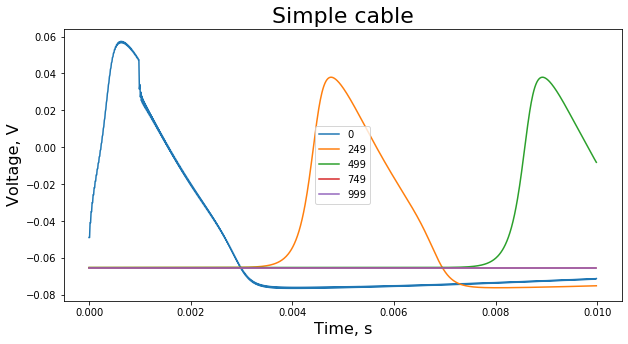

In [9]:
Compartment_plot(t=t, tmax=tmax, V=results_s, k=5, title='Simple cable')

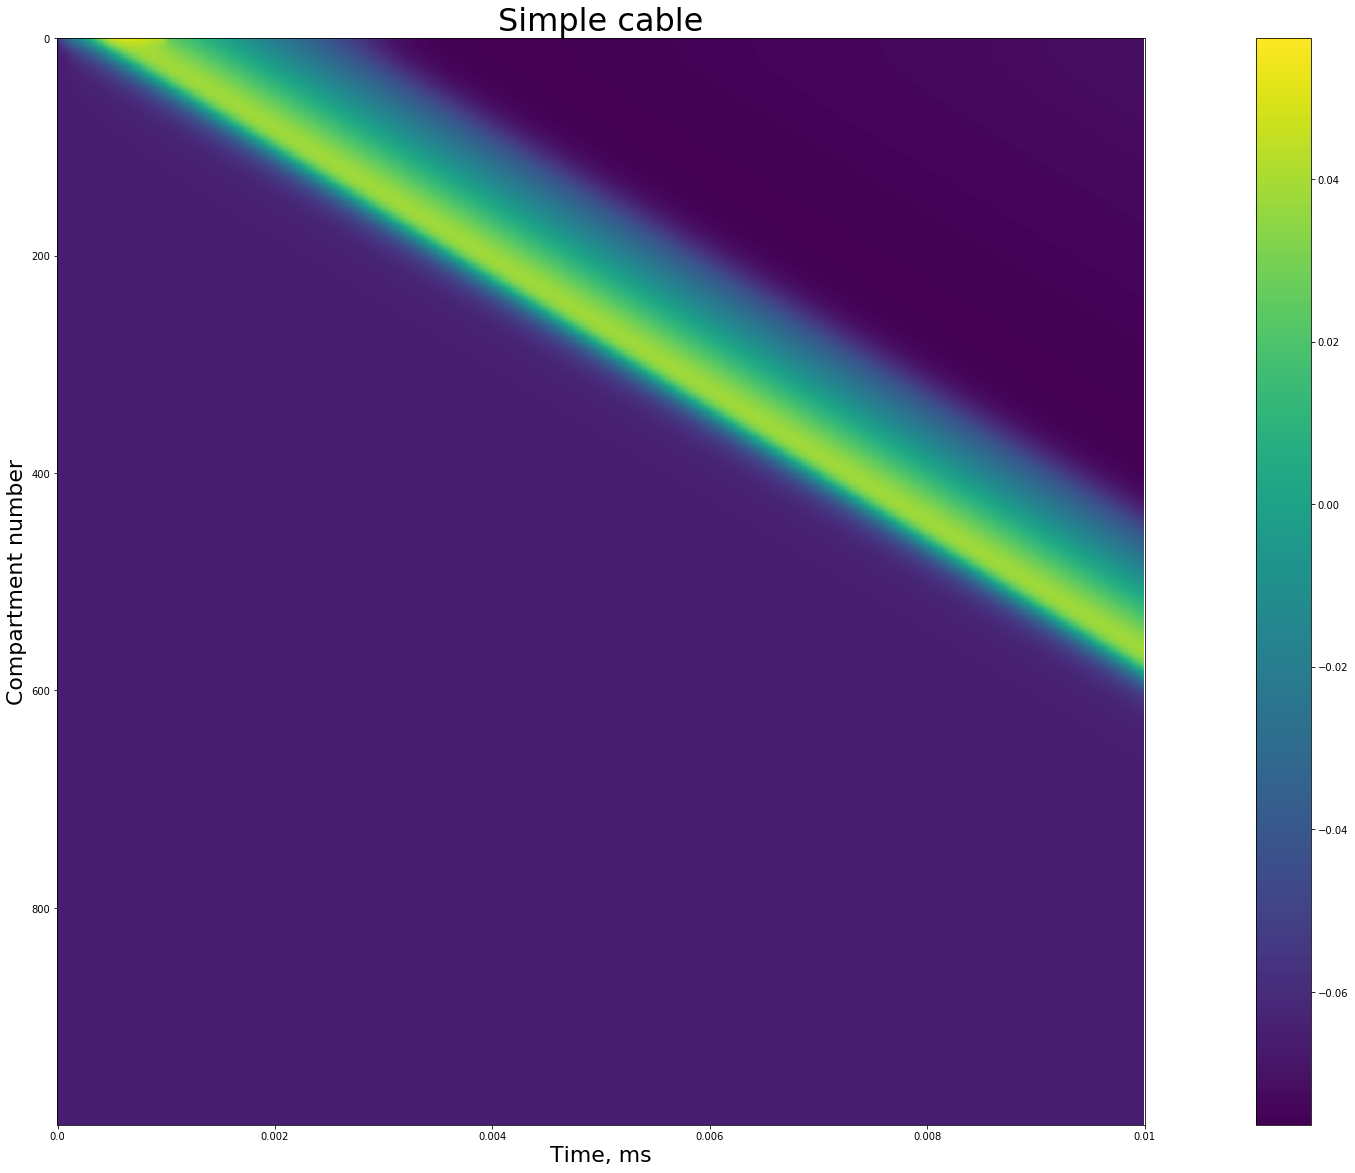

In [10]:
Cable_plot(t=t, V=results_s, title="Simple cable")

#### Velocity

In [11]:
### Setting model parameters ###
model_velocity = Model
model_velocity.Parameters(self=model_velocity, Ek=-0.077, gk=360, Ena=0.050, gna=1200, Eleak=-0.054387, gleak=3)
model_velocity.Initial_values(self=model_velocity, n0=0.3177, m0=0.0529, h0=0.5961, V0=-0.065)

### Creating arrays ###
results_v = np.zeros((11, 1000, N-1)) # Voltage time series
radius = np.linspace(2e-06, 2e-04, 11) # Radius values
v = np.zeros(11) # Velocities

for i, r in enumerate(radius):
    # Setting the radius and adjusting parameters
    # Wider cables need to be longer, and need a stronger current impulse
    model_velocity.Cable(self=model_velocity, a=r, rL=0.354, L=2e-06, Cm=0.01)
    model_velocity.Myelin(self=model_velocity, ranvier=2e-06, interval=1e-03, length=0.008*np.sqrt(r/2e-06), toggle=False)
    
    # Current
    Ie = np.zeros(model_velocity.M)
    Ie[0] = 1e-05 * (r / 2e-04)**2
    
    #Running calculations
    results_v[i,:,:] = HH(tmax=tmax, dt=dt, model=model_velocity, Ie=Ie)
    
    # Calculating veocity: the time difference between the peaks in two compartments
    # Using compartments 850 and 150 to ignore boundary effects
    # Comes to a total distance of 0.7 * model.length
    v[i] = 0.7 * model_velocity.length / (np.argmax(results_v[i,850,:]) - np.argmax(results_v[i,150,:])) / dt
    
    # Show progress
    print(i, v[i])
    
np.save("model_velocity", results_v)

0 1.1023622047244093
1 3.639465138095566
2 5.017667882558092
3 6.095922435543605
4 7.010246051364585
5 7.833755340540415
6 8.55044492536444
7 9.242766407167375
8 9.872144393112867
9 10.463734466216062
10 11.023622047244093


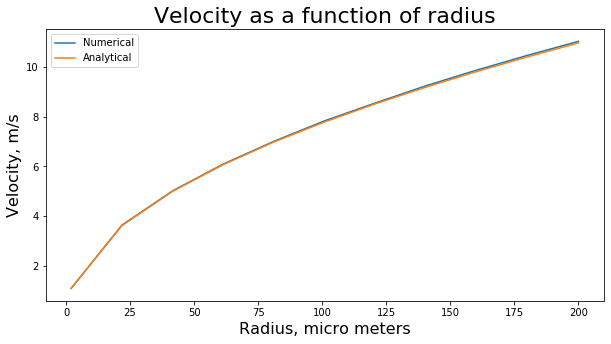

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(radius/1e-06, v, label="Numerical")
ax.plot(radius/1e-06, 775*np.sqrt(radius) , label="Analytical")
ax.set_title("Velocity as a function of radius", fontsize=22, y=1)
ax.set_ylabel('Velocity, m/s', fontsize=16)
ax.set_xlabel('Radius, micro meters', fontsize=16);
ax.legend()
bx = plt.gca()
bx.ticklabel_format(useOffset=False)

#### Annihilation

In [13]:
### Setting model parameters ###
model_anni = Model
model_anni.Parameters(self=model_anni, Ek=-0.077, gk=360, Ena=0.050, gna=1200, Eleak=-0.054387, gleak=3)
model_anni.Initial_values(self=model_anni, n0=0.3177, m0=0.0529, h0=0.5961, V0=-0.065)
model_anni.Cable(self=model_anni, a=238e-06, rL=0.354, L=2e-06, Cm=0.01)
model_anni.Myelin(self=model_anni, ranvier=2e-06, interval=1e-03, length=0.2, toggle=False)

### Defining injected current ###
Ie = np.zeros(model_anni.M)
Ie[0] = 1e-05
Ie[-1] = 1e-05

### Running calculations ###
results_a = HH(tmax=tmax, dt=dt, model=model_anni, Ie=Ie)
np.save("model_anni", results_a)

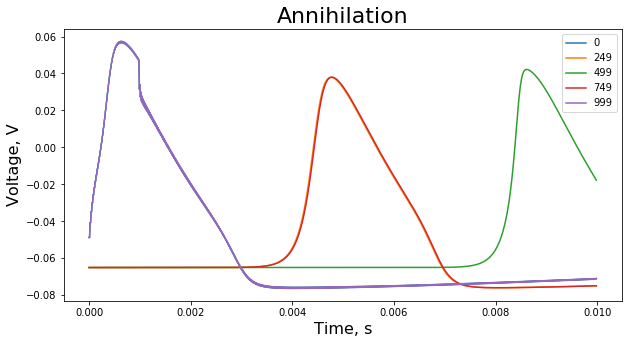

In [14]:
Compartment_plot(t=t, tmax=tmax, V=results_a, k=5, title='Annihilation')

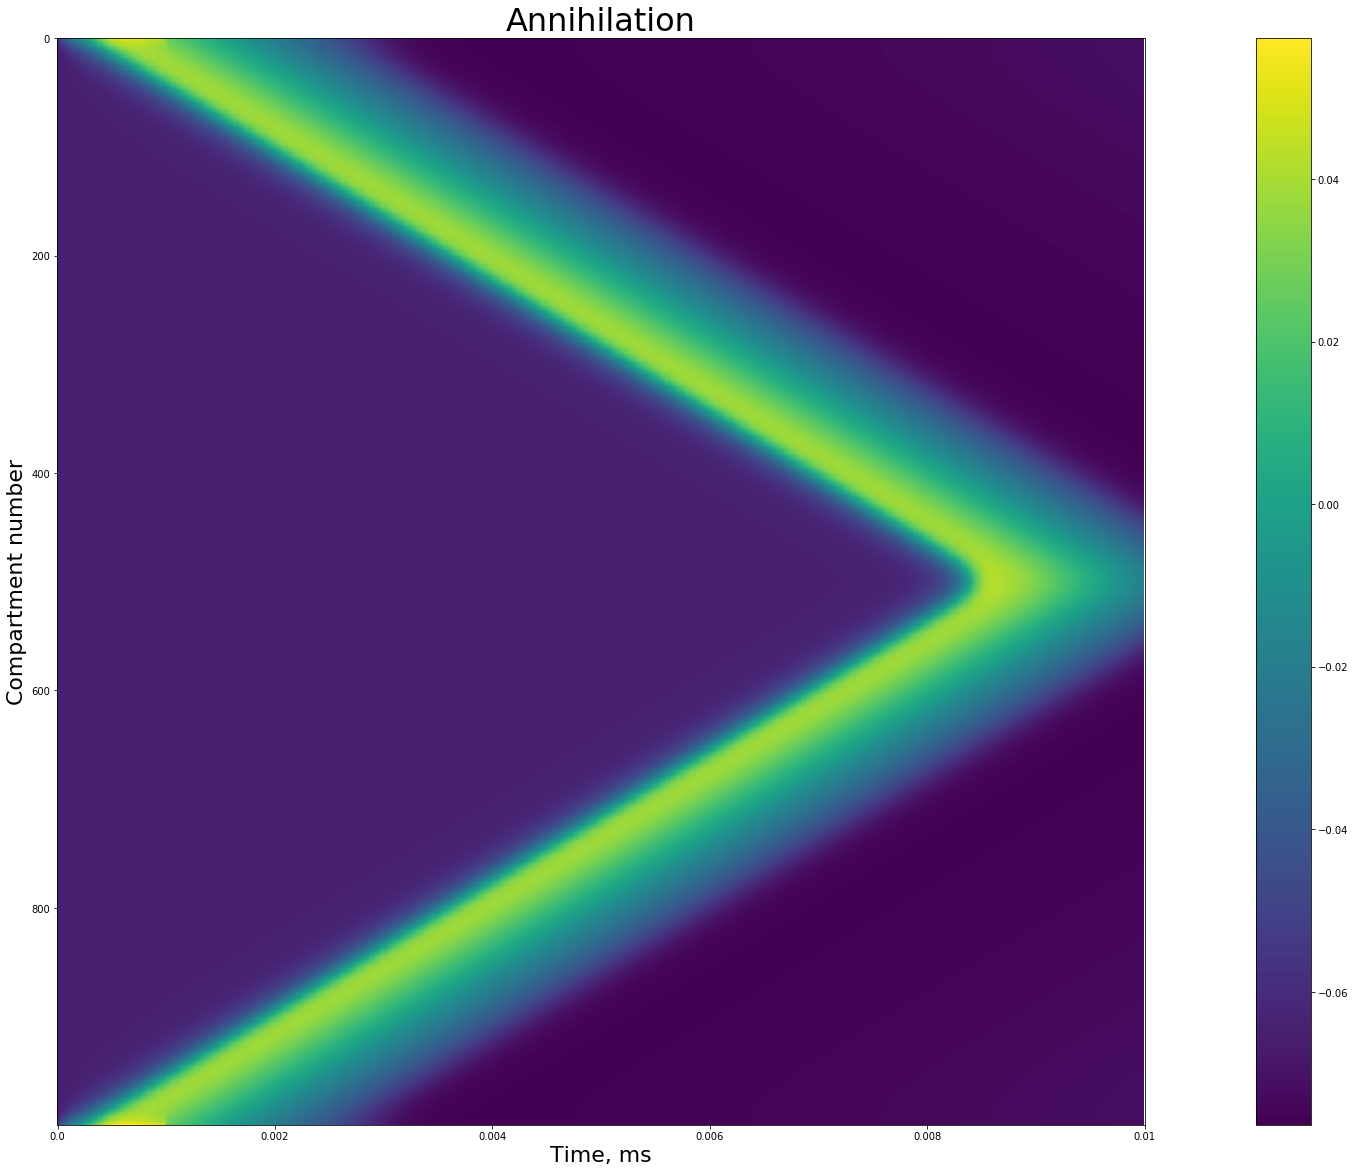

In [15]:
Cable_plot(t=t, V=results_a, title="Annihilation")

#### Myelin

In [16]:
### Setting model parameters ###
model_myelin = Model
model_myelin.Parameters(self=model_myelin, Ek=-0.077, gk=360, Ena=0.050, gna=1200, Eleak=-0.054387, gleak=3)
model_myelin.Initial_values(self=model_myelin, n0=0.3177, m0=0.0529, h0=0.5961, V0=-0.065)
model_myelin.Cable(self=model_myelin, a=238e-06, rL=0.354, L=2e-06, Cm=0.01)
model_myelin.Myelin(self=model_myelin, ranvier=2e-06, interval=1e-03, length=0.5, toggle=True) # toggle is True!

### Defining injected current ###
Ie = np.zeros(model_myelin.M)
Ie[0] = 1e-05

### Running calculations ###
results_m = HH(tmax=tmax, dt=dt, model=model_myelin, Ie=Ie)
np.save("model_myelin", results_m)

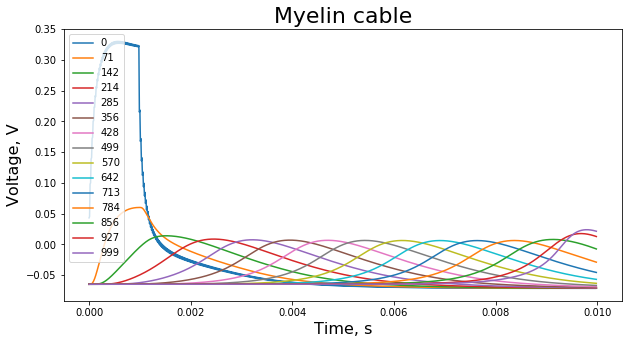

In [17]:
Compartment_plot(t=t, tmax=tmax, V=results_m, k=15, title='Myelin cable')

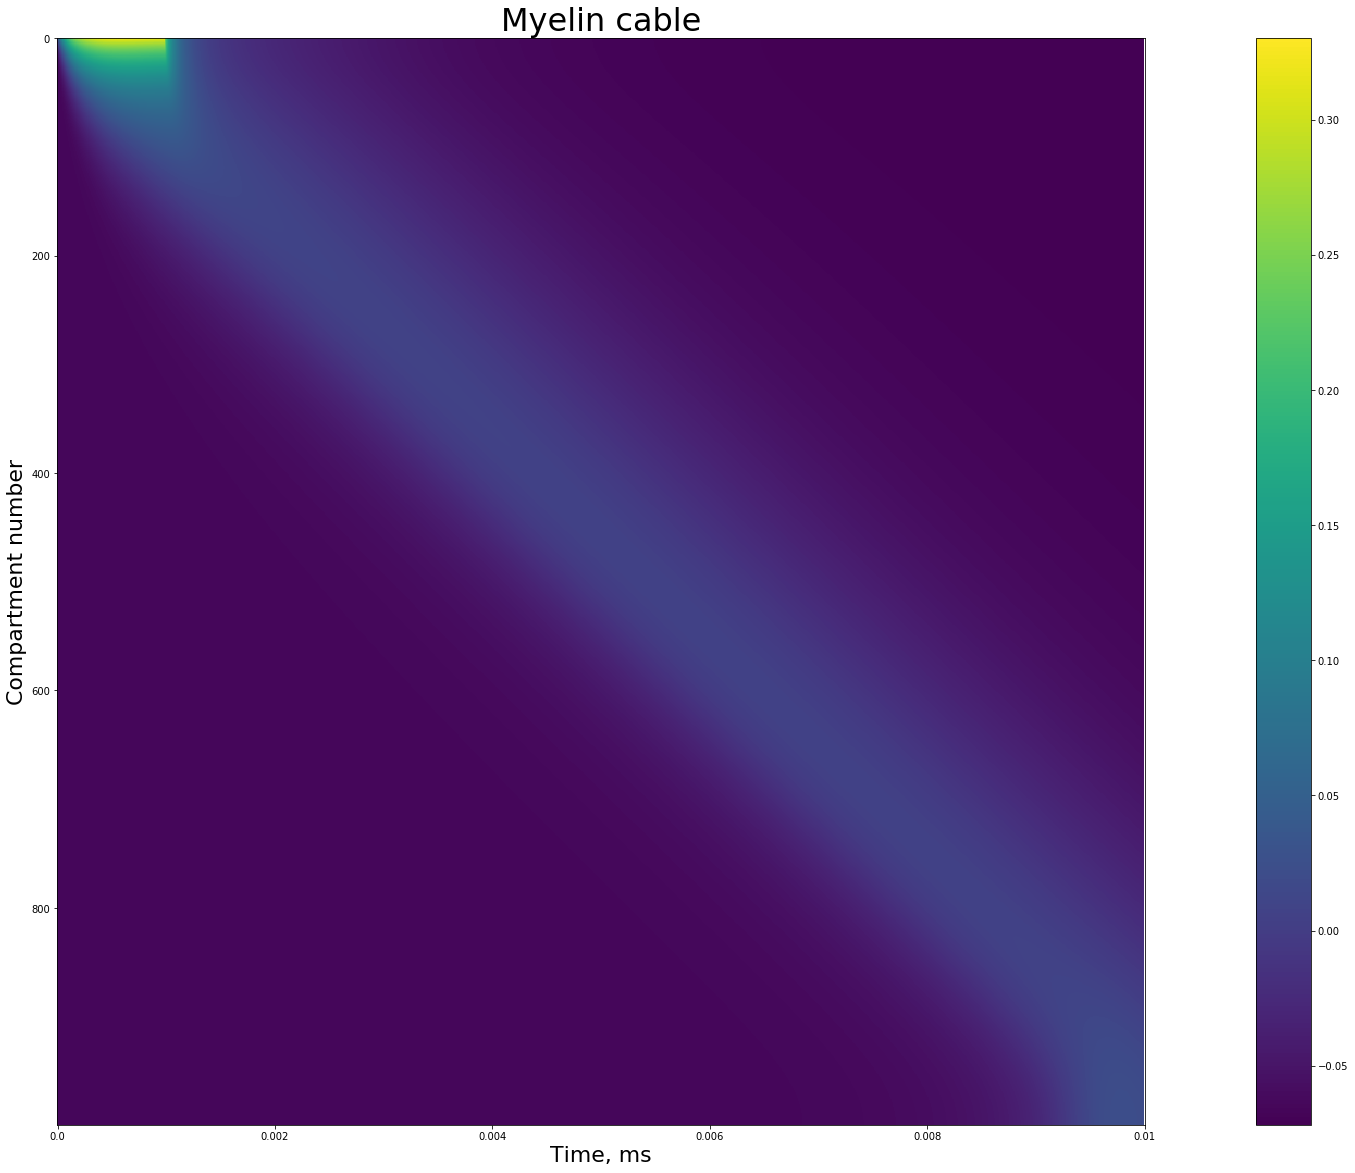

In [18]:
Cable_plot(t=t, V=results_m, title="Myelin cable")

In [19]:
v_myelin = 0.250 * model_myelin.length / (np.argmax(results_m[400,:]) - np.argmax(results_m[150,:])) / dt

In [20]:
v_myelin

45.45454545454545

## Branching

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

An Isolated Branching Node - Analytically

Dayan & Abott Section 6.3

## $v_1(x) = p_1 I_e R_{\lambda_1} exp(\frac{-x_1}{\lambda_1} - \frac{y}{\lambda_2})$

## $v_2(x) = \frac{I_e R_{\lambda_2}}{2} [exp(\frac{-|y-x_2|}{\lambda_2}) + (2p_2 - 1)exp(\frac{-(y+x_2)}{\lambda_2})]$

## $v_3(x) = p_3 I_e R_{\lambda_3} exp(\frac{-x_3}{\lambda_3} - \frac{y}{\lambda_2})$

where, for $i = 1, 2, 3,$

## $p_i = \frac{a_i^{3/2}}{a_1^{3/2} + a_2^{3/2} + a_3^{3/2}}, \quad \lambda_i = \sqrt{\frac{a_i r_m}{2r_L}}, \quad R_{\lambda_i} = \frac{r_L \lambda_i}{\pi a_i^2}$

Creating functions:

In [4]:
def V1(x,y,p1,lam1,lam2,R1,I_e):
    voltage = p1 * I_e * R1 * np.exp(-x/lam1) * np.exp(-y/lam2)
    return voltage

In [5]:
def V2(x,y,p2,lam2,R2,I_e):
    voltage = ((I_e*R2)/2) * (np.exp(-np.abs(y-x)/lam2) + (2*p2-1) * np.exp(-(y+x)/lam2))
    return voltage

In [6]:
def V3(x,y,p3,lam2,lam3,R3,I_e):
    voltage = p3 * I_e * R3 * np.exp(-x/lam3) * np.exp(-y/lam2)
    return voltage

In [7]:
def p_i(a_i,a1,a2,a3):
    p = (a_i**(3/2)) / ((a1**(3/2)) + (a2**(3/2)) + (a3**(3/2)))
    return p

In [8]:
def lam_i(a_i,r_m,r_L):
    lam = np.sqrt((a_i*r_m)/(2*r_L))
    return lam

In [9]:
def R_lam_i(lam_i,a_i,r_L):
    R = (r_L*lam_i)/(np.pi*(a_i**2))
    return R

Combining the equations:

In [10]:
def voltage(x1,x2,x3,y,a,r_m,r_L,I_e):
    
    if y < 0: #unneeded for our bounds though
        x1,x2 = x2,x1
        
    p1 = p_i(a_i=a[0],a1=a[0],a2=a[1],a3=a[2])
    p2 = p_i(a_i=a[1],a1=a[0],a2=a[1],a3=a[2])
    p3 = p_i(a_i=a[2],a1=a[0],a2=a[1],a3=a[2])
    lam1 = lam_i(a_i=a[0],r_m=r_m,r_L=r_L)
    lam2 = lam_i(a_i=a[1],r_m=r_m,r_L=r_L)
    lam3 = lam_i(a_i=a[2],r_m=r_m,r_L=r_L)
    R_lam1 = R_lam_i(lam_i=lam1,a_i=a[0],r_L=r_L)
    R_lam2 = R_lam_i(lam_i=lam2,a_i=a[1],r_L=r_L)
    R_lam3 = R_lam_i(lam_i=lam3,a_i=a[2],r_L=r_L)

    voltage1 = V1(x=x1,y=y,p1=p1,lam1=lam1,lam2=lam2,R1=R_lam1,I_e=I_e)
    voltage2 = V2(x=x2,y=y,p2=p2,lam2=lam2,R2=R_lam2,I_e=I_e)
    voltage3 = V3(x=x3,y=y,p3=p3,lam2=lam2,lam3=lam3,R3=R_lam3,I_e=I_e)
    
    if y < 0: #to account for change in equations
        voltage1 = V2(x=x1,y=-y,p2=p1,lam2=lam1,R2=R_lam1,I_e=I_e)
        voltage2 = V1(x=x2,y=-y,p1=p2,lam1=lam2,lam2=lam1,R1=R_lam2,I_e=I_e)
        voltage3 = V3(x=x3,y=-y,p3=p3,lam2=lam1,lam3=lam3,R3=R_lam3,I_e=I_e)
        
    v_total = voltage1 + voltage2 + voltage3 
    
    return v_total, voltage1, voltage2, voltage3

Plotting:

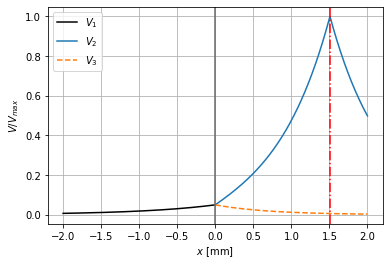

In [11]:
x1 = np.linspace(0,2,1e3) #mm
x2 = np.linspace(0,2,1e3) #mm
x3 = np.linspace(0,2,1e3) #mm

y = -1 #mm
y = 2**(-1/2)+0.8 #mm

a = [2e-3,1e-3,1e-3] #µm
I_e = 1 #whatever
r_m = 1e9 #M.ohm.mm^2
r_L = 1e6 #k.ohm.mm

v_max = voltage(x1=y,x2=y,x3=y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[2]
if y < 0:
    v_max = voltage(x1=-y,x2=-y,x3=-y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[1]
#v_max = 1

plt.plot(-x1,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[1]/v_max,label='$V_1$',c='k')
plt.plot(x2,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[2]/v_max,label='$V_2$')
plt.plot(x3,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[3]/v_max,label='$V_3$',linestyle='--')
plt.axvline(x=0,c='dimgrey',linestyle='-') #branching point
plt.axvline(x=y,c='r',linestyle='-.') #current injection point
plt.ylabel('$V/V_{max}$')
plt.xlabel('$x$ [mm]')
plt.legend()
plt.grid()
plt.show()

In [12]:
volvo = voltage(x1=0,x2=0,x3=0,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)
print(volvo[1]/v_max)
print(volvo[2]/v_max)
print(volvo[3]/v_max)

0.049565501865290254
0.04956550186529026
0.049565501865290254


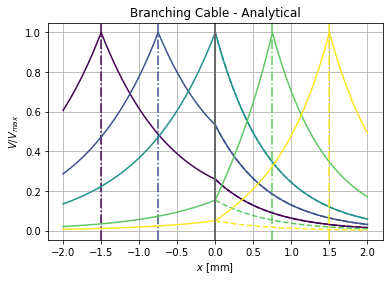

In [13]:
i = [-1.5,-0.75,0,0.75,1.5]
colors = iter(cm.viridis(np.linspace(0, 1, len(i))))
for y in i:
    v_max = voltage(x1=y,x2=y,x3=y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[2]
    if y < 0:
        v_max = voltage(x1=-y,x2=-y,x3=-y,y=y,a=a,r_m=r_m,r_L=r_L,I_e=I_e)[1]
    #v_max = 1
    c = next(colors)
    plt.plot(-x1,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[1]/v_max,c=c)
    plt.plot(x2,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[2]/v_max,c=c)
    plt.plot(x3,voltage(x1,x2,x3,y,a,r_m,r_L,I_e)[3]/v_max,c=c,linestyle='--')
    plt.axvline(x=0,c='dimgrey',linestyle='-') #branching point
    plt.axvline(x=y,c=c,linestyle='-.') #current injection point
plt.title('Branching Cable - Analytical')
plt.ylabel('$V/V_{max}$')
plt.xlabel('$x$ [mm]')
plt.grid()
#plt.savefig('branching')